# Module 7

By: [Tesheena](https://github.com/tsngh)

Date: 10/04/2023

# Part 1 - Linear Regression

Use pandas DataFrames to plot Celsius vs Fahrenheit

In [32]:
import pandas as pd

c= lambda f: 5 / 9 * (f-32)
temps= [(f,c(f)) for f in range(0, 101, 10)]


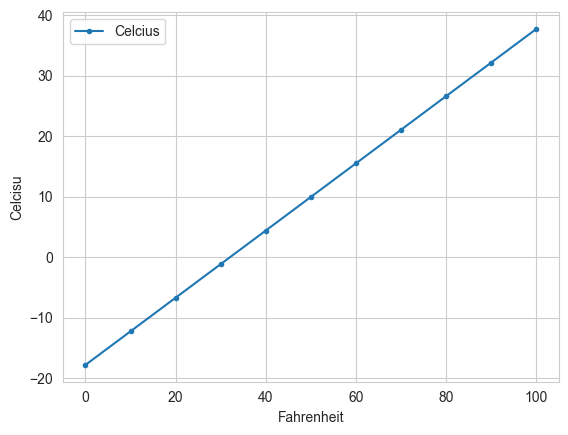

In [33]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celcius'])
axes = temps_df.plot(x='Fahrenheit', y='Celcius', style='.-')
y_label = axes.set_ylabel('Celcisu')

Section 1 - Load: Load NY City January high temperature csv file into a DataFrame

In [34]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

Section 2 - View: View the head and tail of the file

In [35]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [36]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


Section 3 - Clean: Clean the data

In [37]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [38]:
nyc.Date.dtype

dtype('int64')

In [39]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Section 4 - Describe: Use describe() to calculate basic descriptive statistics

In [40]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line.

In [41]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [42]:
linear_regression.slope 

0.014771361132966163

In [43]:
linear_regression.intercept

8.694993233674289

Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026

In [44]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

Section 7 - Plot: Use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit 

(10.0, 70.0)

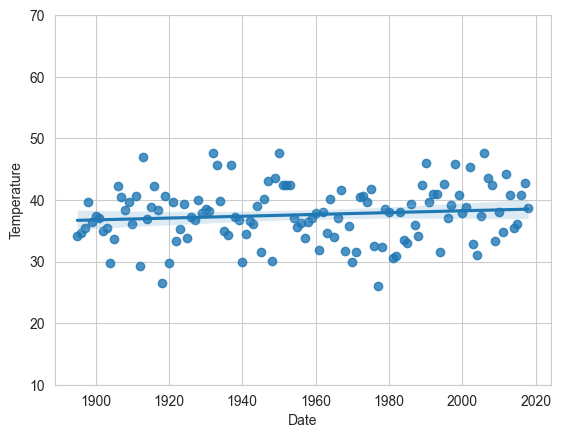

In [45]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

# Part 2 - Machine Learning

Section 1 -  Load, clean and update columns (already done in part one)

In [46]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Section 2- Split Data for Training and Testing

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [54]:
X_train.shape #confirming

(93, 1)

In [55]:
X_test.shape #confirming

(31, 1)

Section 3- Training the Model

In [57]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [58]:
linear_regression.coef_ #slope

array([0.01939167])

In [59]:
linear_regression.intercept_ #intercept

-0.30779820252656975

Section 4- Testing the Model

In [60]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'precidted:  {p:.2f}, expected: {e:.2f}')

precidted:  37.86, expected: 31.70
precidted:  38.69, expected: 34.80
precidted:  37.00, expected: 39.40
precidted:  37.25, expected: 45.70
precidted:  38.05, expected: 32.30
precidted:  37.64, expected: 33.80
precidted:  36.94, expected: 39.70


Section 5- Predicting Future Temperatures and Estimating Past Temperatures

In [61]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)

In [62]:
predict(2026) #future prediction

array([38.97973189])

In [63]:
predict(1890) #past prediction

array([36.34246432])

Section 6- Visualizing with Regression Line

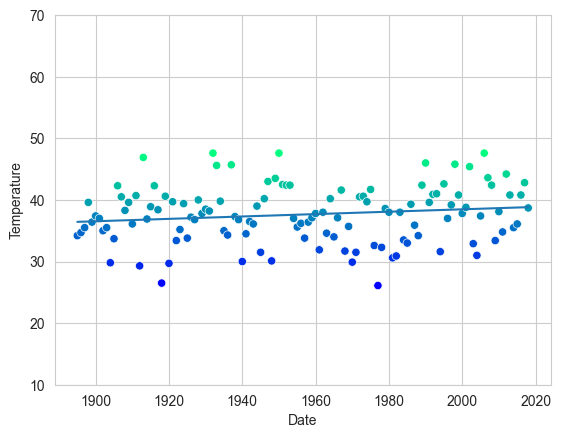

In [71]:
import seaborn as sns
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y= predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)